Ayoola Ogunbona <br>
Cody Padlo <br>
Soraya Karimi <br>

MSDS 422 <br>
Professor Anil Chaturvedi

# Module 4 Assignment 1: Titanic Machine Learning through Disaster

# Import Libraries

In [ ]:
import google
from google.colab import drive

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import scipy
from scipy.stats import ks_2samp

In [ ]:
import seaborn as sns

In [ ]:
import sklearn

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
import statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Display Adjustments

In [ ]:
#%matplotlib inline

# Mount Google Drive

In [ ]:
# note that the shared folder has to be added as a shortcut to "My Drive"
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 4: Titanic Machine Learning through Disaster/titanic/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
test_file_path = project_path + "test.csv"
test_df = pd.read_csv(test_file_path, sep=',')
print("Full test dataset shape is {}".format(test_df.shape))

Full test dataset shape is (418, 11)


In [ ]:
train_file_path = project_path + "train.csv"
train_df = pd.read_csv(train_file_path, sep=',')
print("Full train dataset shape is {}".format(train_df.shape))

Full train dataset shape is (891, 12)


# Initial Review

## Test

In [ ]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Train

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Creation

## Test

In [ ]:
train_df['Actual_Name'] = np.where(train_df['Sex'] == 'male',
                                   train_df['Name'].str.extract(r'\(([^)]+)\)', expand=False).fillna(train_df['Name']),
                                   train_df['Name']
)

In [ ]:
test_df['Sex'] = np.where(test_df['Sex'] == 'male', 0, 1)

In [ ]:
test_df['Embarked'] = np.where(test_df['Embarked'] == 'S', 1,
                               np.where(test_df['Embarked'] == 'C', 2,
                                        np.where(test_df['Embarked'] == 'Q', 3, np.nan)))

In [ ]:
test_df['Deck'] = test_df['Cabin'].str[0]

In [ ]:
test_df['DeckLevel'] = test_df['Deck'].map({'A': 1,
                                            'B': 2,
                                            'C': 3,
                                            'D': 4,
                                            'E': 5,
                                            'F': 6,
                                            'G': 7,
                                            'T': 8}
                                          )

In [ ]:
test_df['RoomNo'] = test_df['Cabin'].str[1:]

## Train

In [ ]:
train_df['Actual_Name'] = np.where(train_df['Sex'] == 'male',
                                   train_df['Name'].str.extract(r'\(([^)]+)\)', expand=False).fillna(train_df['Name']),
                                   train_df['Name']
)

In [ ]:
train_df['Sex'] = np.where(train_df['Sex'] == 'male', 0, 1)

In [ ]:
train_df['Embarked'] = np.where(train_df['Embarked'] == 'S', 1,
                                np.where(train_df['Embarked'] == 'C', 2,
                                         np.where(train_df['Embarked'] == 'Q', 3, 0)))

In [ ]:
train_df['Deck'] = train_df['Cabin'].str[0]

In [ ]:
train_df['DeckLevel'] = train_df['Deck'].map({'A': 1,
                                              'B': 2,
                                              'C': 3,
                                              'D': 4,
                                              'E': 5,
                                              'F': 6,
                                              'G': 7,
                                              'T': 8}
                                            )

In [ ]:
train_df['RoomNo'] = train_df['Cabin'].str[1:]

# Second Review

## Test

In [ ]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'DeckLevel', 'RoomNo'],
      dtype='object')

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,DeckLevel,RoomNo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3.0,NaN,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1.0,NaN,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3.0,NaN,NaN,NaN
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1.0,NaN,NaN,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1.0,NaN,NaN,NaN


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    float64
 11  Deck         91 non-null     object 
 12  DeckLevel    91 non-null     float64
 13  RoomNo       91 non-null     object 
dtypes: float64(4), int64(5), object(5)
memory usage: 45.8+ KB


In [ ]:
for column in test_df.columns:
  print(column)
  print(test_df[column].describe())

PassengerId
count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64
Pclass
count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Name
count                          418
unique                         418
top       Peter, Master. Michael J
freq                             1
Name: Name, dtype: object
Sex
count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64
Age
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
SibSp
count    418.000000
mean       0.

In [ ]:
f_scores_list = []
p_values_list = []
valid_vars = []

X = train_df.drop(columns=['PassengerId', 'Survived'])
y = train_df['Survived']

for col in X.columns:
    X_col = X[[col]].dropna()
    y_col = y.loc[X_col.index]

    try:
        f_score, p_val = f_regression(X_col, y_col)
        f_scores_list.append(f_score[0])
        p_values_list.append(p_val[0])
        valid_vars.append(col)
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

eval_table = pd.DataFrame({
    "variable": valid_vars,
    "f_scores": f_scores_list,
    "p_values": p_values_list
}).sort_values(by="p_values", ascending=True)

display(eval_table)

Skipping Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Ticket due to error: could not convert string to float: 'A/5 21171'
Skipping Cabin due to error: could not convert string to float: 'C85'
Skipping Actual_Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Deck due to error: could not convert string to float: 'C'
Skipping RoomNo due to error: could not convert string to float: '23 C25 C27'


,variable,f_scores,p_values
1,Sex,372.405724,1.406066e-69
0,Pclass,115.031272,2.537047e-25
5,Fare,63.030764,6.120189e-15
6,Embarked,9.318420,2.336110e-03
4,Parch,5.963464,1.479925e-02
2,Age,4.271195,3.912465e-02
3,SibSp,1.110572,2.922439e-01
7,DeckLevel,0.071612,7.892768e-01


## Train

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Actual_Name', 'Deck',
       'DeckLevel', 'RoomNo'],
      dtype='object')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Actual_Name,Deck,DeckLevel,RoomNo
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,"Braund, Mr. Owen Harris",NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,3.0,85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"Heikkinen, Miss. Laina",NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C,3.0,123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,"Allen, Mr. William Henry",NaN,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Actual_Name  891 non-null    object 
 13  Deck         204 non-null    object 
 14  DeckLevel    204 non-null    float64
 15  RoomNo       204 non-null    object 
dtypes: float64(3), int64(7), object(6)
memory usage: 111.5+ KB


In [ ]:
for column in train_df.columns:
  print(column)
  print(train_df[column].describe())

PassengerId
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
Survived
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
Pclass
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Name
count                     891
unique                    891
top       Dooley, Mr. Patrick
freq                        1
Name: Name, dtype: object
Sex
count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64
Age
count    714.000000
mean      29.699118
std       14.

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Actual_Name,Deck,DeckLevel,RoomNo
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,"Braund, Mr. Owen Harris",NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,3.0,85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"Heikkinen, Miss. Laina",NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C,3.0,123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,"Allen, Mr. William Henry",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1,"Montvila, Rev. Juozas",NaN,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1,"Graham, Miss. Margaret Edith",B,2.0,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2,"Behr, Mr. Karl Howell",C,3.0,148


In [ ]:
train_corr = train_df.drop(columns=['PassengerId']).select_dtypes(include=['number']).corr()

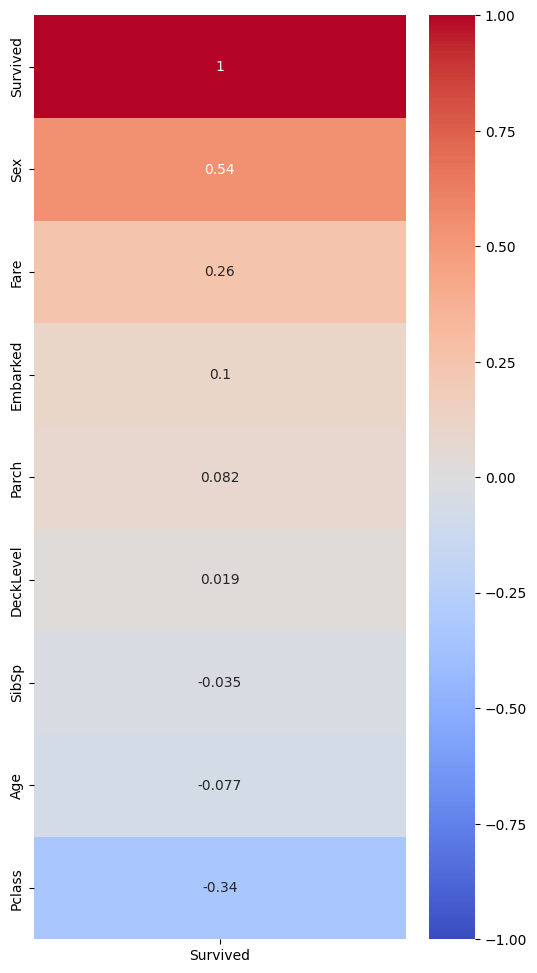

In [ ]:
plt.figure(figsize=(6, 12))
sns.heatmap(train_corr[['Survived']].sort_values(
                                              by='Survived',
                                              ascending=False
                                             ),
            cmap="coolwarm",
            annot=True,
            vmin=-1,
            vmax=1
           )
plt.show()

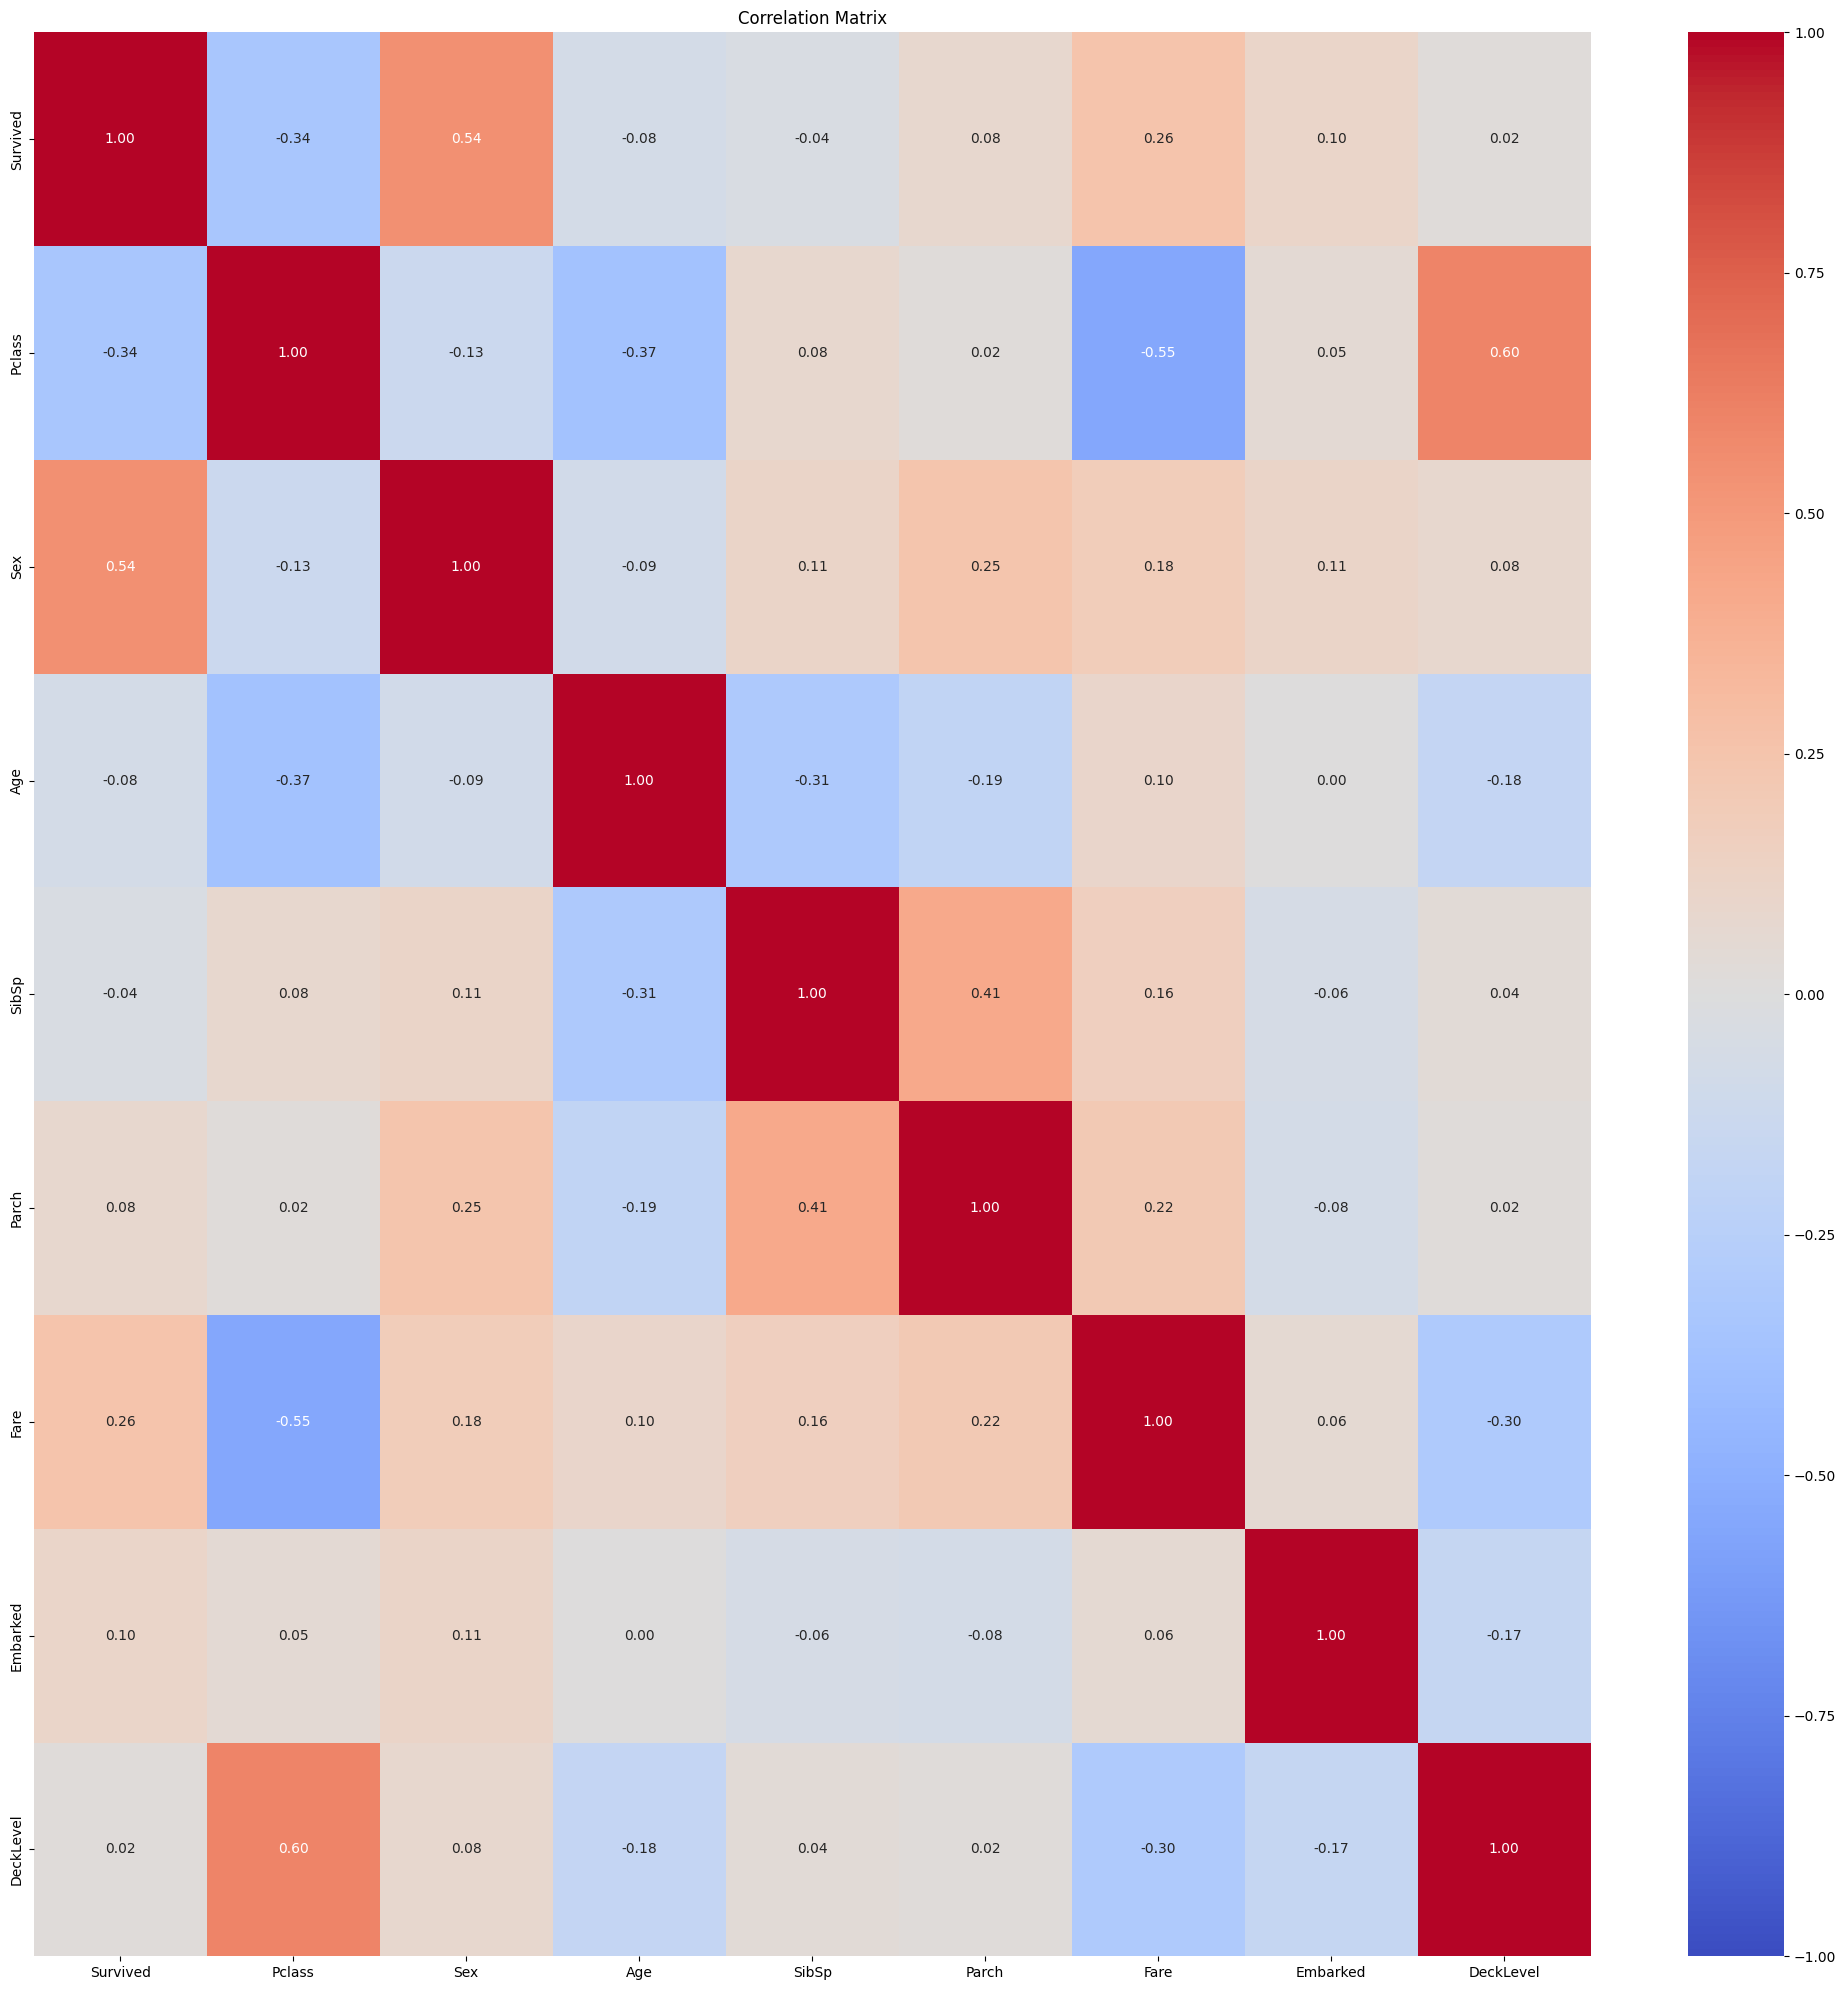

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_corr,
            annot=True,
            vmin=-1,
            vmax=1 ,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
f_scores_list = []
p_values_list = []
valid_vars = []

X = train_df.drop(columns=['PassengerId', 'Survived'])
y = train_df['Survived']

for col in X.columns:
    X_col = X[[col]].dropna()
    y_col = y.loc[X_col.index]

    try:
        f_score, p_val = f_regression(X_col, y_col)
        f_scores_list.append(f_score[0])
        p_values_list.append(p_val[0])
        valid_vars.append(col)
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

eval_table = pd.DataFrame({
    "variable": valid_vars,
    "f_scores": f_scores_list,
    "p_values": p_values_list
}).sort_values(by="p_values", ascending=True, ignore_index=True)

display(eval_table)

Skipping Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Ticket due to error: could not convert string to float: 'A/5 21171'
Skipping Cabin due to error: could not convert string to float: 'C85'
Skipping Actual_Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Deck due to error: could not convert string to float: 'C'
Skipping RoomNo due to error: could not convert string to float: '23 C25 C27'


,variable,f_scores,p_values
0,Sex,372.405724,1.406066e-69
1,Pclass,115.031272,2.537047e-25
2,Fare,63.030764,6.120189e-15
3,Embarked,9.318420,2.336110e-03
4,Parch,5.963464,1.479925e-02
5,Age,4.271195,3.912465e-02
6,SibSp,1.110572,2.922439e-01
7,DeckLevel,0.071612,7.892768e-01


Comparing the train and test datasets, the only difference, column-wise, is the inclusion of the **Survived** column in the train dataset. <br>
Despite the different number of rows in each dataset, only **Fare** (test_df), **Age**, **Cabin**, and **Embarked** (train_df) had nulls. <br>
Statistics for min/max and quartiles are rather similiar across the dataset. <br>
**Cabin** may benefit from being split into deck and room number.

# Model Generation

## Model 1A: LDA

In [ ]:
lda_features = train_df.drop(columns=['PassengerId', 'Survived']).select_dtypes(include='number').columns
lda_features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'DeckLevel'],
      dtype='object')

In [ ]:
lda_X = train_df[lda_features]
lda_y = train_df['Survived']

In [ ]:
# Generate Test/Train Splits
lda_X_train, lda_X_val, lda_y_train, lda_y_val = train_test_split(
    lda_X, lda_y, test_size=0.2, random_state=42, stratify=lda_y
)

In [ ]:
# Pipeline - Imputer + StandardScalar + LDA
lda_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

In [ ]:
# Cross-validation for LDA
lda_cv_scores = cross_val_score(lda_pipeline, lda_X, lda_y, cv=12, scoring='accuracy')
print(f'LDA Cross-Validation Accuracy: {lda_cv_scores.mean()} (+/- {lda_cv_scores.std()})')

LDA Cross-Validation Accuracy: 0.7923573573573575 (+/- 0.034577499712519)


In [ ]:
# Fit LDA model
lda_pipeline.fit(lda_X_train, lda_y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

### Evaluate against known Survivors

In [ ]:
# Predictions on validation set
lda_val_preds = lda_pipeline.predict(lda_X_val)
lda_val_probs = lda_pipeline.predict_proba(lda_X_val)[:, 1]

In [ ]:
# Print validation accuracy
print("LDA Validation Accuracy:", accuracy_score(lda_y_val, lda_val_preds))

LDA Validation Accuracy: 0.7988826815642458


In [ ]:
# Confusion Matrix
lda_cm = confusion_matrix(lda_y_val, lda_val_preds, labels=[0, 1])

In [ ]:
# Define labels
lda_labels = ['Died', 'Survived']

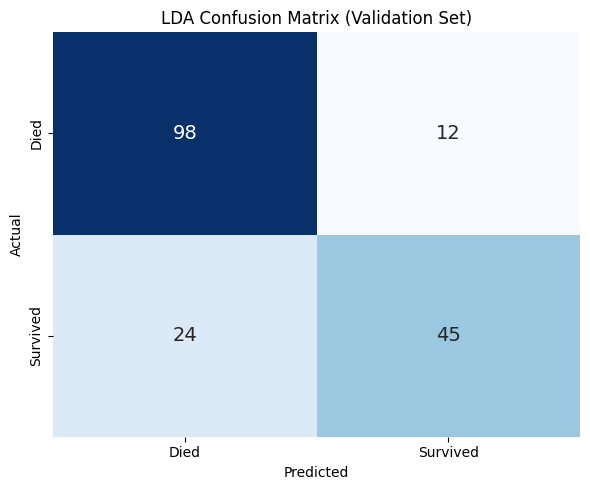

In [ ]:
# Pretty confusion matrix for LDA
plt.figure(figsize=(6,5))
sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lda_labels, yticklabels=lda_labels, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix (Validation Set)')
plt.tight_layout()
plt.show()

In [ ]:
# Classification report for LDA
print(classification_report(lda_y_val, lda_val_preds, target_names=lda_labels))

              precision    recall  f1-score   support

        Died       0.80      0.89      0.84       110
    Survived       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


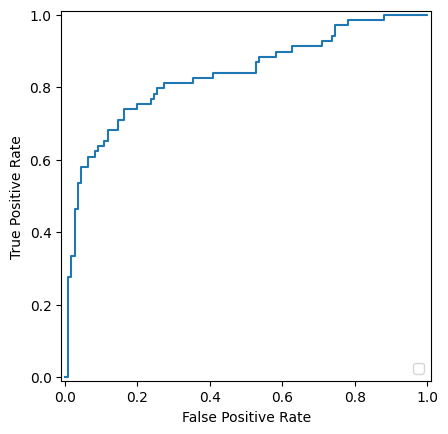

In [ ]:
# ROC Curve for LDA
lda_fpr, lda_tpr, _ = roc_curve(lda_y_val, lda_val_probs)
RocCurveDisplay(fpr=lda_fpr, tpr=lda_tpr).plot()
plt.show()

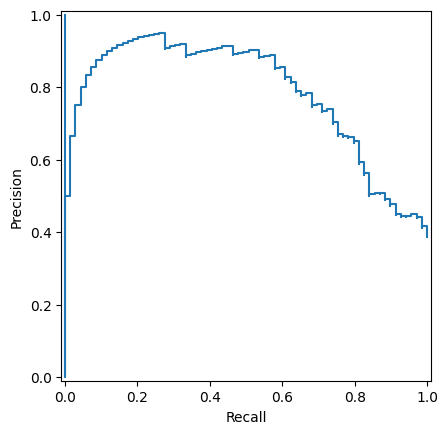

In [ ]:
# Precision-Recall Curve for LDA
lda_precision, lda_recall, _ = precision_recall_curve(lda_y_val, lda_val_probs)
PrecisionRecallDisplay(precision=lda_precision, recall=lda_recall).plot()
plt.show()

In [ ]:
# Comparison DataFrame for LDA
lda_comparison_df = pd.DataFrame({
    'Actual': lda_y_val,
    'Predicted': lda_val_preds
}).reset_index(drop=True)

In [ ]:
lda_comparison_df['Correct'] = lda_comparison_df['Actual'] == lda_comparison_df['Predicted']

In [ ]:
def highlight_correct(val):
    return 'background-color: lightgreen' if val else 'background-color: lightcoral'

In [ ]:
lda_pretty_df_styled = lda_comparison_df.style.map(
    highlight_correct, subset=['Correct']
).set_caption("LDA Prediction Comparison (Validation Set)")

In [ ]:
lda_pretty_df_styled

,Actual,Predicted,Correct
0,0,0,True
1,0,0,True
2,1,0,False
3,0,0,True
4,1,1,True
5,1,1,True
6,1,1,True
7,0,0,True
8,0,0,True
9,0,0,True


### Generate LDA Predictions

In [ ]:
lda_test_X = test_df[lda_features]

In [ ]:
lda_test_predictions = lda_pipeline.predict(lda_test_X)

In [ ]:
test_df['Survived'] = lda_test_predictions

In [ ]:
lda_predictions = test_df[['PassengerId', 'Survived']]

In [ ]:
# Export test predictions to CSV
lda_predictions.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 4: Titanic Machine Learning through Disaster/predictions_lda.csv", index=False)

## Model 1B: QDA


In [ ]:
qda_features = train_df.drop(columns=['PassengerId', 'Survived']).select_dtypes(include='number').columns
qda_features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'DeckLevel'],
      dtype='object')

In [ ]:
qda_X = train_df[qda_features]
qda_y = train_df['Survived']

In [ ]:
# Generate Test/Train Splits
qda_X_train, qda_X_val, qda_y_train, qda_y_val = train_test_split(
    qda_X, qda_y, test_size=0.2, random_state=42, stratify=qda_y
)

In [ ]:
# Create QDA pipeline
qda_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('qda', QuadraticDiscriminantAnalysis())
])

In [ ]:
# Fit QDA model
qda_pipeline.fit(qda_X_train, qda_y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('qda', QuadraticDiscriminantAnalysis())])

### Evaluate against known Survivors

In [ ]:
# Predict on validation set
qda_val_preds = qda_pipeline.predict(qda_X_val)
qda_val_probs = qda_pipeline.predict_proba(qda_X_val)[:, 1]

In [ ]:
# Accuracy
print("QDA Validation Accuracy:", accuracy_score(qda_y_val, qda_val_preds))

QDA Validation Accuracy: 0.7932960893854749


In [ ]:
# Confusion Matrix
qda_cm = confusion_matrix(qda_y_val, qda_val_preds, labels=[0, 1])
qda_labels = ['Died', 'Survived']

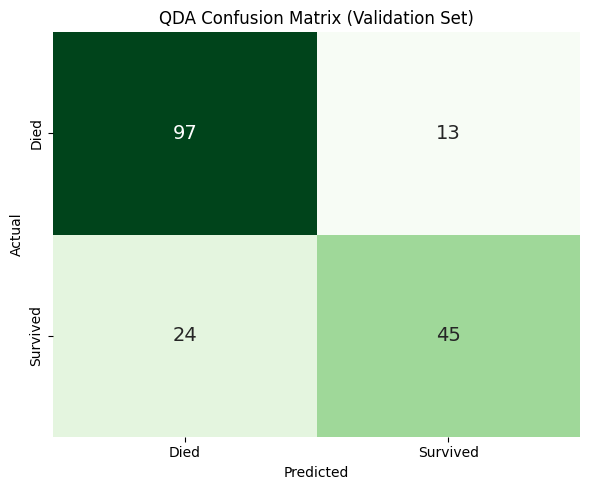

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(qda_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=qda_labels, yticklabels=qda_labels, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('QDA Confusion Matrix (Validation Set)')
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
print("QDA Classification Report:")
print(classification_report(qda_y_val, qda_val_preds, target_names=qda_labels))

QDA Classification Report:
              precision    recall  f1-score   support

        Died       0.80      0.88      0.84       110
    Survived       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


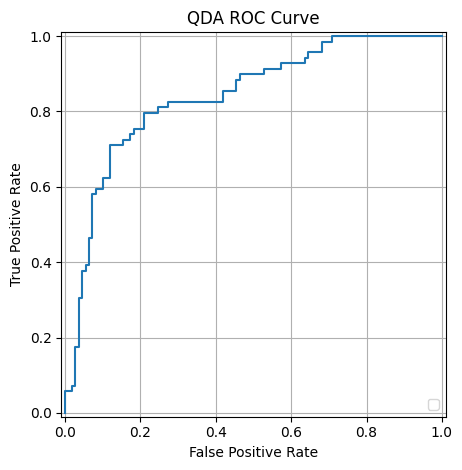

In [ ]:
# ROC Curve
qda_fpr, qda_tpr, _ = roc_curve(qda_y_val, qda_val_probs)
RocCurveDisplay(fpr=qda_fpr, tpr=qda_tpr).plot()
plt.title("QDA ROC Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

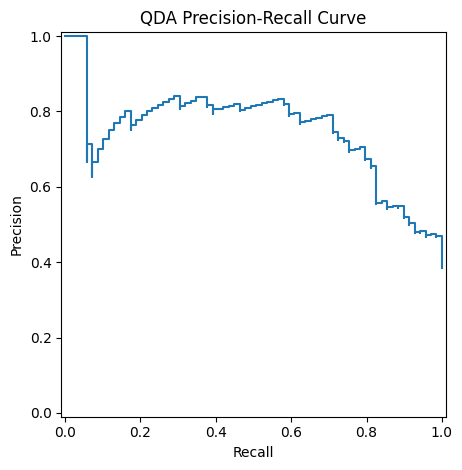

In [ ]:
# Precision-Recall Curve
qda_precision, qda_recall, _ = precision_recall_curve(qda_y_val, qda_val_probs)
PrecisionRecallDisplay(precision=qda_precision, recall=qda_recall).plot()
plt.title("QDA Precision-Recall Curve")
plt.tight_layout()
plt.show()

In [ ]:
# Comparison Table for QDA
qda_comparison_df = pd.DataFrame({
    'Actual': qda_y_val,
    'Predicted': qda_val_preds
})

In [ ]:
qda_comparison_df['Correct'] = qda_comparison_df['Actual'] == qda_comparison_df['Predicted']

In [ ]:
def highlight_qda(val):
    return 'background-color: lightgreen' if val else 'background-color: lightcoral'

In [ ]:
qda_pretty_df_styled = qda_comparison_df.style.map(
    highlight_qda, subset=['Correct']
).set_caption("QDA Prediction Comparison (Validation Set)")

In [ ]:
qda_pretty_df_styled

,Actual,Predicted,Correct
565,0,0,True
160,0,0,True
553,1,0,False
860,0,0,True
241,1,1,True
559,1,1,True
387,1,1,True
536,0,0,True
698,0,0,True
99,0,0,True


In [ ]:
# Confusion Matrix
qda_cm = confusion_matrix(qda_y_val, qda_val_preds, labels=[0, 1])

In [ ]:
qda_labels = ['Died', 'Survived']

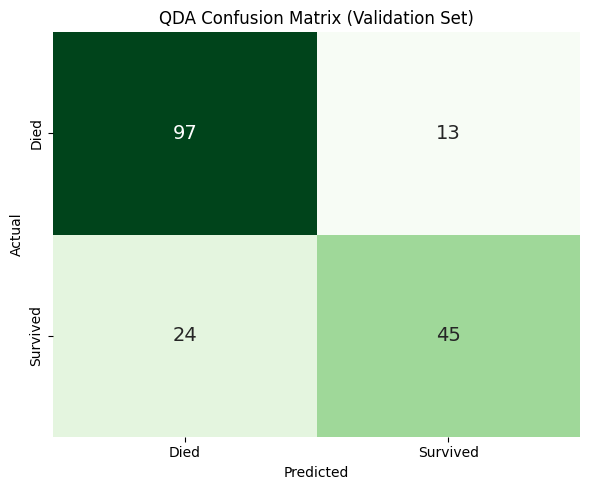

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(qda_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=qda_labels, yticklabels=qda_labels, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('QDA Confusion Matrix (Validation Set)')
plt.tight_layout()
plt.show()

### Generate QDA Predictions

In [ ]:
qda_test_X = test_df[qda_features]

In [ ]:
qda_test_predictions = qda_pipeline.predict(qda_test_X)

In [ ]:
test_df['Survived'] = qda_test_predictions

In [ ]:
qda_predictions = test_df[['PassengerId', 'Survived']]

In [ ]:
# Export test predictions to CSV
qda_predictions.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 4: Titanic Machine Learning through Disaster/predictions_qda.csv", index=False)

## Model 2: KNN

In [ ]:
knn_features = train_df.drop(columns=['PassengerId', 'Survived']).select_dtypes(include='number').columns
knn_features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'DeckLevel'],
      dtype='object')

In [ ]:
knn_X = train_df[knn_features]
knn_y = train_df['Survived']

In [ ]:
# Generate Test/Train Splits
knn_X_train, knn_X_val, knn_y_train, knn_y_val = train_test_split(
    knn_X, knn_y, test_size=0.2, random_state=42, stratify=knn_y
)

In [ ]:
# Pipeline - Imputer + StandardScalar + KNN
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
# Grid Parameters
knn_param_grid = {'knn__n_neighbors': list(range(1, 21))}

In [ ]:
# Grid Search for Parameter Search
knn_grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    cv=12,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
# Identify Parameters
knn_grid_search.fit(knn_X, knn_y)

GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [ ]:
print("Best n_neighbors:", knn_grid_search.best_params_['knn__n_neighbors'])
print("Best cross-validation accuracy:", knn_grid_search.best_score_)

Best n_neighbors: 7
Best cross-validation accuracy: 0.8238888888888889


In [ ]:
best_knn_model = knn_grid_search.best_estimator_

### Evaluate against known Survivors

In [ ]:
knn_val_preds = best_knn_model.predict(knn_X_val)

In [ ]:
knn_val_probs = best_knn_model.predict_proba(knn_X_val)[:, 1]

In [ ]:
print("Validation Accuracy:", accuracy_score(knn_y_val, knn_val_preds))

Validation Accuracy: 0.8379888268156425


In [ ]:
# Create the confusion matrix
knn_cm = confusion_matrix(knn_y_val, knn_val_preds, labels=[0, 1])
knn_cm

array([[99, 11],
       [18, 51]])

In [ ]:
# Define labels
knn_labels = ['Died', 'Survived']

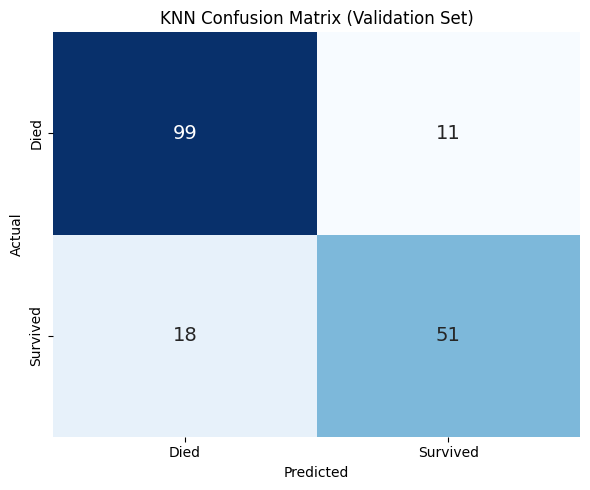

In [ ]:
# Pretty confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_labels, yticklabels=knn_labels, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix (Validation Set)')
plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(knn_y_val, knn_val_preds, target_names=knn_labels))

              precision    recall  f1-score   support

        Died       0.85      0.90      0.87       110
    Survived       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


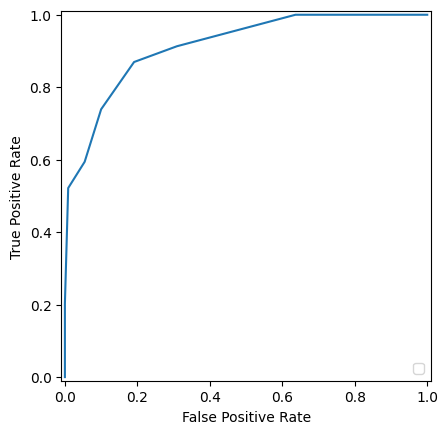

In [ ]:
# ROC Curve
knn_fpr, knn_tpr, _ = roc_curve(knn_y_val, knn_val_probs)
RocCurveDisplay(fpr=knn_fpr, tpr=knn_tpr).plot()
plt.show()

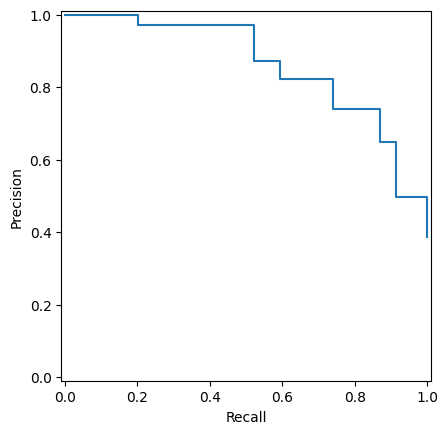

In [ ]:
# Precision-Recall Curve
knn_precision, knn_recall, _ = precision_recall_curve(knn_y_val, knn_val_probs)
PrecisionRecallDisplay(precision=knn_precision, recall=knn_recall).plot()
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': knn_y_val,
    'Predicted': knn_val_preds
}).reset_index(drop=True)

In [ ]:
comparison_df['Correct'] = comparison_df['Actual'] == comparison_df['Predicted']

In [ ]:
def highlight_correct(val):
    return 'background-color: lightgreen' if val else 'background-color: lightcoral'

In [ ]:
pretty_df_styled = comparison_df.style.map(
    highlight_correct, subset=['Correct']
).set_caption("KNN Prediction Comparison (Validation Set)")

In [ ]:
pretty_df_styled

,Actual,Predicted,Correct
0,0,0,True
1,0,0,True
2,1,0,False
3,0,0,True
4,1,1,True
5,1,0,False
6,1,1,True
7,0,0,True
8,0,0,True
9,0,0,True


### Generate KNN Predictions

In [ ]:
knn_test_X = test_df[knn_features]

In [ ]:
knn_test_predictions = best_knn_model.predict(knn_test_X)

In [ ]:
test_df['Survived'] = knn_test_predictions

In [ ]:
knn_predictions = test_df[['PassengerId', 'Survived']]

In [ ]:
# Export test predictions to CSV
knn_predictions.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 4: Titanic Machine Learning through Disaster/predictions_knn.csv", index=False)

## Model 3: Logistic Regression

In [ ]:
lr_features = train_df.drop(columns=['PassengerId', 'Survived']).select_dtypes(include='number').columns
lr_features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'DeckLevel'],
      dtype='object')

In [ ]:
# Cleanse Data
lr_X = train_df[lr_features]
lr_y = train_df['Survived']

In [ ]:
# quick check for multicollinearity
X_scaled = StandardScaler().fit_transform(lr_X)
X_df = pd.DataFrame(X_scaled, columns=lr_X.columns)
# quick median impute
X_df.fillna(X_df.median(numeric_only=True), inplace=True)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# ok with this, no value above 5
print(vif_data)

     feature       VIF
0     Pclass  1.711690
1        Sex  1.127953
2        Age  1.211169
3      SibSp  1.279670
4      Parch  1.330351
5       Fare  1.639075
6   Embarked  1.052071
7  DeckLevel  1.021813


In [ ]:
# quick test, employ Box-Tidwell Test to confirm "each continuous predictor has a linear relationship with the log-odds of the outcome." (ChatGPT)

X_logit = lr_X.copy()
# quick impute
X_logit.fillna(X_logit.median(numeric_only=True), inplace=True)
y_logit = lr_y.copy()

# Add small constant to avoid log(0)
for col in X_logit.columns:
    X_logit[f"{col}_log"] = X_logit[col] * np.log(X_logit[col] + 1e-5)

X_logit = sm.add_constant(X_logit)
model = sm.Logit(y_logit, X_logit)
result = model.fit()

print(result.summary())
"""
Age_log, SibSp_log have statistically significant P values, so may not have a linear relationship with the log-odds of the outcome.
"""

Optimization terminated successfully.
         Current function value: 0.426734
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           15
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.3592
Time:                        22:21:06   Log-Likelihood:                -380.22
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.117e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2403      2.582      0.868      0.386      -2.820       7.301
Pclass           -0.

'\nAge_log, SibSp_log have statistically significant P values, so may not have a linear relationship with the log-odds of the outcome.\n'

In [ ]:
# attempt squaring features to eliminate non-linear relationship
lr_X["Age"] = lr_X["Age"]**2
lr_X["SibSp"] =  lr_X["SibSp"]**2

# retry
X_logit = lr_X.copy()
# quick impute
X_logit.fillna(X_logit.median(numeric_only=True), inplace=True)
y_logit = lr_y.copy()

# Add small constant to avoid log(0)
for col in X_logit.columns:
    X_logit[f"{col}_log"] = X_logit[col] * np.log(X_logit[col] + 1e-5)

X_logit = sm.add_constant(X_logit)
model = sm.Logit(y_logit, X_logit)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.432758
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           15
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.3501
Time:                        22:21:06   Log-Likelihood:                -385.59
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.848e-79
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5804      2.495      0.233      0.816      -4.309       5.470
Pclass           -0.

/tmp/ipython-input-138-2632741133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_X["Age"] = lr_X["Age"]**2
/tmp/ipython-input-138-2632741133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_X["SibSp"] =  lr_X["SibSp"]**2


In [ ]:
# age is still showing a non-linear relationship with the log odds. Will attempt a spline in the pipeline below

In [ ]:
# define which features need spline versus scaled
numeric_scaled = ["Fare"]
numeric_splined = ["Age","SibSp","Parch"] # parch had a low enough p value to be concerned w linear assumptions
categorical = ["Sex", "Pclass", "Embarked","DeckLevel"]

In [ ]:
# Create transformers
spline_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("spline", SplineTransformer(n_knots=4, degree=3, include_bias=False))
])

scale_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical - encoded
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("scale", scale_pipeline, numeric_scaled),
    ("spline", spline_pipeline, numeric_splined),
    ("cat", categorical_pipeline, categorical)
])

In [ ]:
# # our outer pipeline
clf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", max_iter=1000))
])

In [ ]:
# use GridSearch to find our best hyperparameters
lr_X = train_df[lr_features]
lr_y = train_df['Survived']

param_grid = {
    "classifier__C": [0.01, 0.1, 1.0, 10.0],           # Inverse of regularization strength
    "classifier__penalty": ["l1", "l2"],              # L1 = Lasso, L2 = Ridge
}

cv_tuner = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=12, shuffle=True, random_state=42), # implement stratified k fold to maintain class distribution balance
    scoring="f1",         # Tune for best F1
    n_jobs=-1,
    refit=True
)

cv_tuner.fit(lr_X, lr_y)

print("Best LR Parameters:", cv_tuner.best_params_)
best_lr_model = cv_tuner.best_estimator_

Best LR Parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1'}


In [ ]:
# evaluate effect on regulatization on column features
for feature, coef in zip(lr_X.columns, best_lr_model.named_steps["classifier"].coef_[0]):
    print(f"{feature}: {coef}")

Pclass: 0.18111246812660012
Sex: 20.44811946993432
Age: -0.9897001894080872
SibSp: 0.0
Parch: -1.1672849740142963
Fare: -1.9876271822672542
Embarked: -2.102801912677304
DeckLevel: 3.2073604351688028


### Evaluate against known Survivors

In [ ]:
# use cross validation to obtain metrics

scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": "roc_auc",
    "log_loss": make_scorer(log_loss, response_method = "predict_proba", greater_is_better=False)
}

cv_results = cross_validate(
    best_lr_model,
    lr_X,
    lr_y,
    cv=StratifiedKFold(n_splits=12, shuffle=True, random_state=42),
    scoring=scoring,
    return_train_score=False
)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy: 0.820 ± 0.044
precision: 0.775 ± 0.063
recall: 0.751 ± 0.084
f1: 0.761 ± 0.064
roc_auc: 0.858 ± 0.046
log_loss: -0.437 ± 0.063


In [ ]:
# obtain y_pred using the best model
X_train, X_test, y_train, y_test = train_test_split(
    lr_X, lr_y, test_size=0.2, stratify=y, random_state=42
)

# Refit the best pipeline on training set
best_lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('spline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('spline',
                                                                   SplineTransformer(include_bias=False,
                                                                                     n_knots=4))]),
                                                  ['Age', 'SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Pclass', 'Embarked',
                                                   'DeckLevel'])])),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

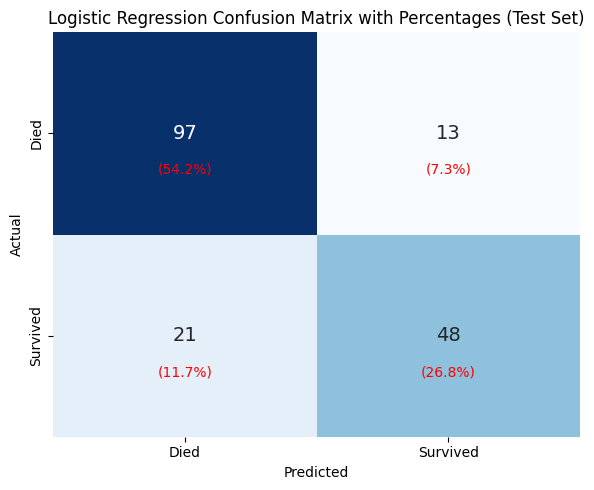

              precision    recall  f1-score   support

        Died       0.82      0.88      0.85       110
    Survived       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# prompt: confusion matric with probabilities in each cell adjusting below code

# Create the confusion matrix
lr_cm = confusion_matrix(y_test, best_lr_model.predict(X_test), labels=[0, 1])

# Calculate percentages
total_samples = lr_cm.sum()
lr_cm_percent = lr_cm.astype('float') / total_samples * 100

# Define labels
lr_labels = ['Died', 'Survived']

# Pretty confusion matrix with percentages
plt.figure(figsize=(6,5))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_labels, yticklabels=lr_labels, cbar=False, annot_kws={'size':14})

# Add percentage annotations
for i in range(lr_cm.shape[0]):
    for j in range(lr_cm.shape[1]):
        plt.text(j + 0.5, i + 0.7, f'({lr_cm_percent[i, j]:.1f}%)',
                 horizontalalignment="center", color="red", fontsize=10)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix with Percentages (Test Set)')
plt.tight_layout()
plt.show()

print(classification_report(y_test, best_lr_model.predict(X_test), target_names=lr_labels))

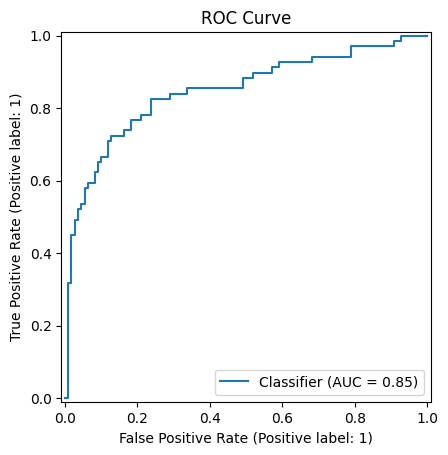

In [ ]:
# roc curve
y_proba = best_lr_model.predict_proba(X_test)[:, 1]  # Probability of positive class
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

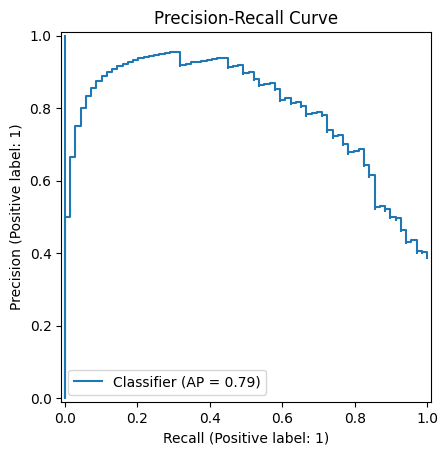

In [ ]:
# precision recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve")
plt.show()

### Generate Logistic Regression Predictions

In [ ]:
lr_test_X = test_df[lr_features]

In [ ]:
lr_test_predictions = best_lr_model.predict(lr_test_X)

In [ ]:
test_df['Survived'] = lr_test_predictions

In [ ]:
lr_predictions = test_df[['PassengerId', 'Survived']]
lr_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


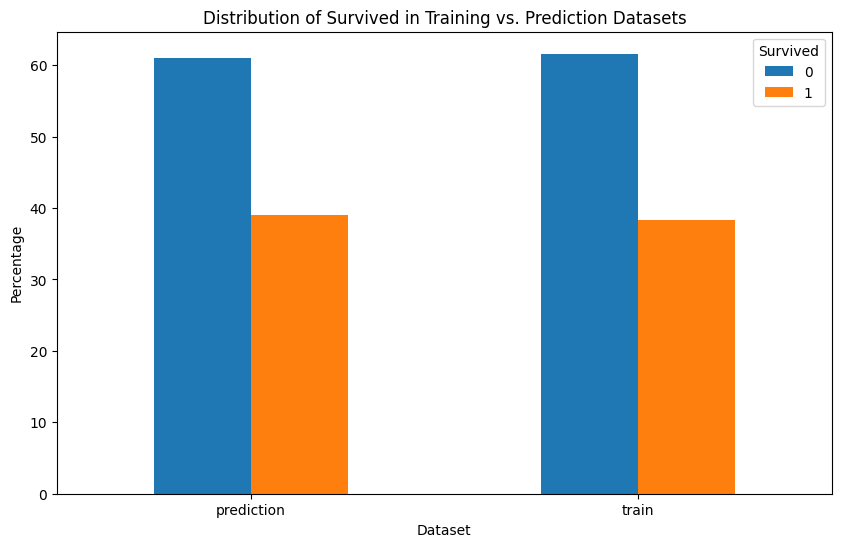

In [ ]:
# prompt: Using dataframe lr_predictions: make plots that compare distribution of the prediction dataset to the training dataset, using percentages of the whole

import pandas as pd
import matplotlib.pyplot as plt

# Combine the prediction data with the training data for comparison
combined_data = pd.concat([pd.DataFrame(lr_y)['Survived'],
                           lr_predictions['Survived']], keys=['train', 'prediction']).reset_index()
combined_data.columns = ['dataset', 'index', 'Survived']

# Calculate the value counts and normalize them to percentages
distribution = combined_data.groupby('dataset')['Survived'].value_counts(normalize=True).unstack() * 100

# Create a bar plot
distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Survived in Training vs. Prediction Datasets')
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', loc='upper right')
plt.show()

In [ ]:
distribution

Survived,0,1
dataset,,
prediction,61.004785,38.995215
train,61.616162,38.383838


In [ ]:
# Export test predictions to CSV
lr_predictions.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 4: Titanic Machine Learning through Disaster/predictions_lr.csv", index=False)